In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Topicos/Tareas

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Topicos/Tareas'
/content


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Topicos/Tareas/MatminerDescriptoresBulk-Compound.csv')

Tarea

In [ ]:
#Construya un modelo de regresión no lineal usando ``G_VRH``, ``elastic_anisotropy``, o ``poisson_ratio`` como salida (target).

# Importación de Datos

In [ ]:
df = df.dropna()

In [ ]:
# Find columns with a single unique value
single_unique_cols = df.columns[df.nunique() == 1]

# Drop columns with a single unique value
df= df.drop(single_unique_cols, axis='columns')

df.shape

(1181, 146)

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 146 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    material_id                           object 
 1    formula                               object 
 2    space_group                           int64  
 3    structure                             object 
 4    elastic_anisotropy                    float64
 5    G_VRH                                 float64
 6    K_VRH                                 float64
 7    poisson_ratio                         float64
 8    cif                                   object 
 9    kpoint_density                        int64  
 10   poscar                                object 
 11   composition                           object 
 12   MagpieData minimum Number             float64
 13   MagpieData maximum Number             float64
 14   MagpieData range Number               float64
 15   Ma

In [ ]:
df.drop(['material_id', "formula", 'elastic_anisotropy' ,"material_id", "structure", "composition", "composition_oxid",'composition',
            "space_group",'kpoint_density','poscar','cif'], axis=1,inplace=True)

In [ ]:
#Lo que se necesita es descartar las features con correlaciones > cor
def correlation(dataset, cor):
    df = dataset.copy()
    col_corr = set()                 # Almacena elementos no repetidos
    corr_matrix = dataset.corr()     #Matriz de correlaciones
    for i in range(len(corr_matrix.columns)):             #Conteo en filas de la matriz correlación
        #print('i',i)
        for j in range(i):                                #Conteo en columnas por debajo de la diagonal, pues la matriz es simétrica: empieza en fila 1 (la 0 es de la diagonal)
            #print('j',j)
            if abs(corr_matrix.iloc[i, j]) > cor:         #Valor absoluto de las correlaciones
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    df.drop(col_corr,axis = 1,inplace = True)             #Descriptores a eliminarse
    return df,col_corr

In [ ]:
cor=0.85
select,selecnames=correlation(df, cor)
selecnames

{'MagpieData avg_dev AtomicWeight',
 'MagpieData avg_dev Column',
 'MagpieData avg_dev CovalentRadius',
 'MagpieData avg_dev Electronegativity',
 'MagpieData avg_dev GSbandgap',
 'MagpieData avg_dev GSmagmom',
 'MagpieData avg_dev GSvolume_pa',
 'MagpieData avg_dev MeltingT',
 'MagpieData avg_dev MendeleevNumber',
 'MagpieData avg_dev NUnfilled',
 'MagpieData avg_dev NValence',
 'MagpieData avg_dev NdUnfilled',
 'MagpieData avg_dev NdValence',
 'MagpieData avg_dev NfValence',
 'MagpieData avg_dev NpUnfilled',
 'MagpieData avg_dev NpValence',
 'MagpieData avg_dev NsUnfilled',
 'MagpieData avg_dev NsValence',
 'MagpieData avg_dev Number',
 'MagpieData avg_dev Row',
 'MagpieData avg_dev SpaceGroupNumber',
 'MagpieData maximum AtomicWeight',
 'MagpieData maximum Column',
 'MagpieData maximum NUnfilled',
 'MagpieData maximum NValence',
 'MagpieData maximum NfValence',
 'MagpieData maximum Row',
 'MagpieData mean AtomicWeight',
 'MagpieData mean GSbandgap',
 'MagpieData mean GSmagmom',
 'Mag

In [ ]:
df = select

In [ ]:
# Descriptores
X = df.drop(['poisson_ratio'], axis=1)

In [ ]:
# target output
y = df['poisson_ratio'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Dividiendo el conjunto de datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) #Siempre misma separación

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_scaled = scaler.transform(X)

# Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()

lr.fit(x_train, y_train)

# métricacs
print('R2 = ' + str(round(lr.score(x_test, y_test), 3)))
print('RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y_test, y_pred=lr.predict(x_test))))

R2 = 0.806
RMSE = 0.028


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Usamos 10-fold cross validation (90% entrenamiento, 10% test)
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# validación cruzada para el modelo random forest
scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error',
                         cv=crossvalidation, n_jobs=1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]

print('Cross-validation results:')
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean RMSE: 0.028


Text(0.5, 0, 'Valores reales (y)')

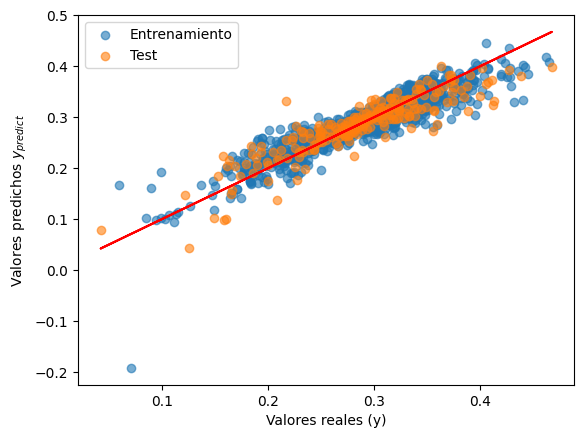

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y,y,c='r')
plt.scatter(y_train,lr.predict(x_train), alpha=0.6, label='Entrenamiento')
plt.scatter(y_test, lr.predict(x_test), alpha=0.6, label='Test')
plt.legend()
plt.ylabel('Valores predichos $y_{predict}$')
plt.xlabel('Valores reales (y)')

In [ ]:
# Métricas de desempeño
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score       # Métricas de Regresión
def metricas(model,x_test,y_test):
  resultados={}
  y_pred = model.predict(x_test)        # Predicción con datos del set de prueba
  y_pred_train = model.predict(x_train)

  mae = mean_absolute_error(y_test, y_pred) # Calculando métrica MAE
  r2 = r2_score(y_test, y_pred)             # Calculando métrica R2
  mse = mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  # Guardando los resultados en un diccionario
  scoring = {'MAE': mae,
           'R2' :r2,
           'MSE': mse,
           'RMSE': rmse
         }
  resultados['rf']=scoring
  resultado_test_regresion = pd.DataFrame(data=resultados)
  return resultado_test_regresion

# Bosques Aleatorios

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=1)

rf.fit(x_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
metricas(rf,x_test,y_test)

,rf
MAE,0.018529
MSE,0.000775
R2,0.808211
RMSE,0.027847


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor     # RandomForest

#Modelo
rf = RandomForestRegressor(random_state=1)

#Parámetros a probar en random forest
param_grid = {
    "n_estimators": [50,75,100],
    #"max_depth": [2,5,10,None],
    "min_samples_split": [2,3,4],
    "max_features": [1,2,3],#,None,'sqrt'
}

search = GridSearchCV(rf, param_grid,cv=5,scoring='r2')
search.fit(x_train, y_train)
print("Mejores parámetros (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Mejores parámetros (CV score=0.649):
{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
metricas(search,x_test,y_test)

,rf
MAE,0.027297
MSE,0.001421
R2,0.648583
RMSE,0.037694


Text(0.5, 1.0, 'Modelo de regresión (RandomForest)')

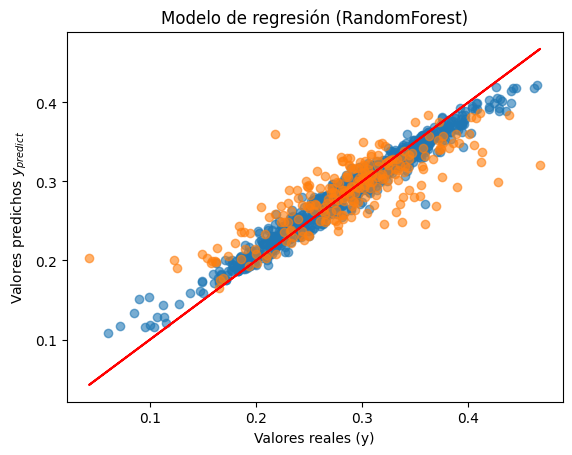

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_train,search.predict(x_train), alpha = 0.6, label='Entrenamiento')
plt.scatter(y_test,search.predict(x_test), alpha = 0.6, label='Test')
plt.plot(y,y,'r')
plt.ylabel('Valores predichos $y_{predict}$')
plt.xlabel('Valores reales (y)')
plt.title("Modelo de regresión (RandomForest)")

In [ ]:
modelo= RandomForestRegressor(**search.best_params_)
modelo.fit(x_train, y_train)

RandomForestRegressor(max_features=3)

In [ ]:
metricas(modelo,x_test,y_test)

,rf
MAE,0.028348
MSE,0.001526
R2,0.622630
RMSE,0.039061


In [ ]:
importancia = modelo.feature_importances_
indx_org=np.argsort(importancia)[::-1]

feature_names=X.columns
etiqueta=np.array(feature_names)[indx_org[:10]] #10 características más importantes
ejex=range(len(importancia[:10]))

# Correlacción mejores valores

<Axes: >

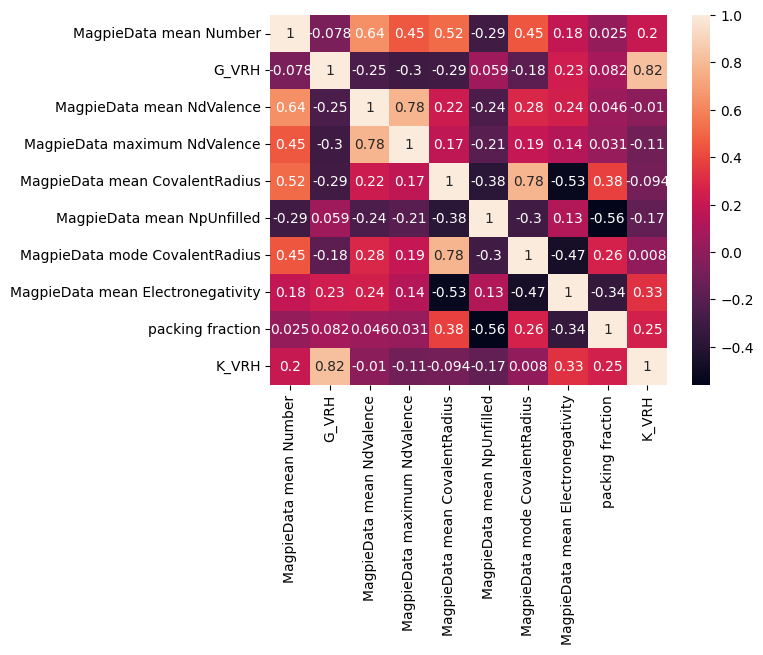

In [ ]:
import seaborn as sns
sns.heatmap(df[etiqueta].corr(), annot=True)

## Carasteristicas Más importantes

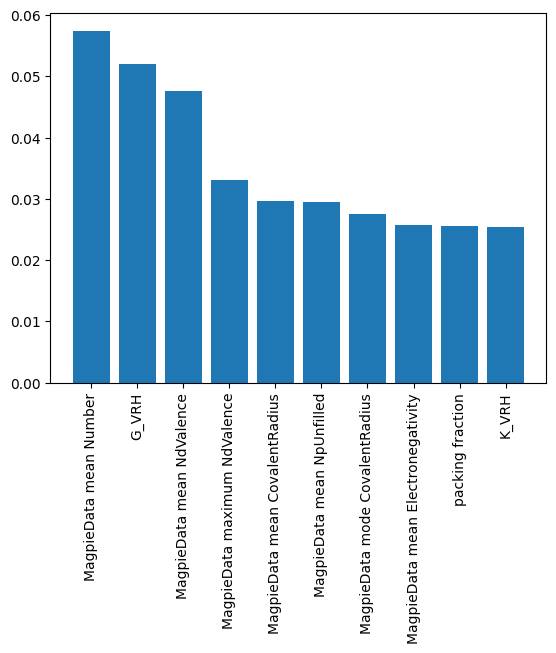

In [ ]:
plt.bar(ejex,importancia[indx_org[:10]],tick_label=etiqueta)
plt.xticks(rotation=90)
plt.show()

In [ ]:
etiqueta

array(['MagpieData mean Number', 'G_VRH', 'MagpieData mean NdValence',
       'MagpieData maximum NdValence', 'MagpieData mean CovalentRadius',
       'MagpieData mean NpUnfilled', 'MagpieData mode CovalentRadius',
       'MagpieData mean Electronegativity', 'packing fraction', 'K_VRH'],
      dtype=object)

## Histogramas

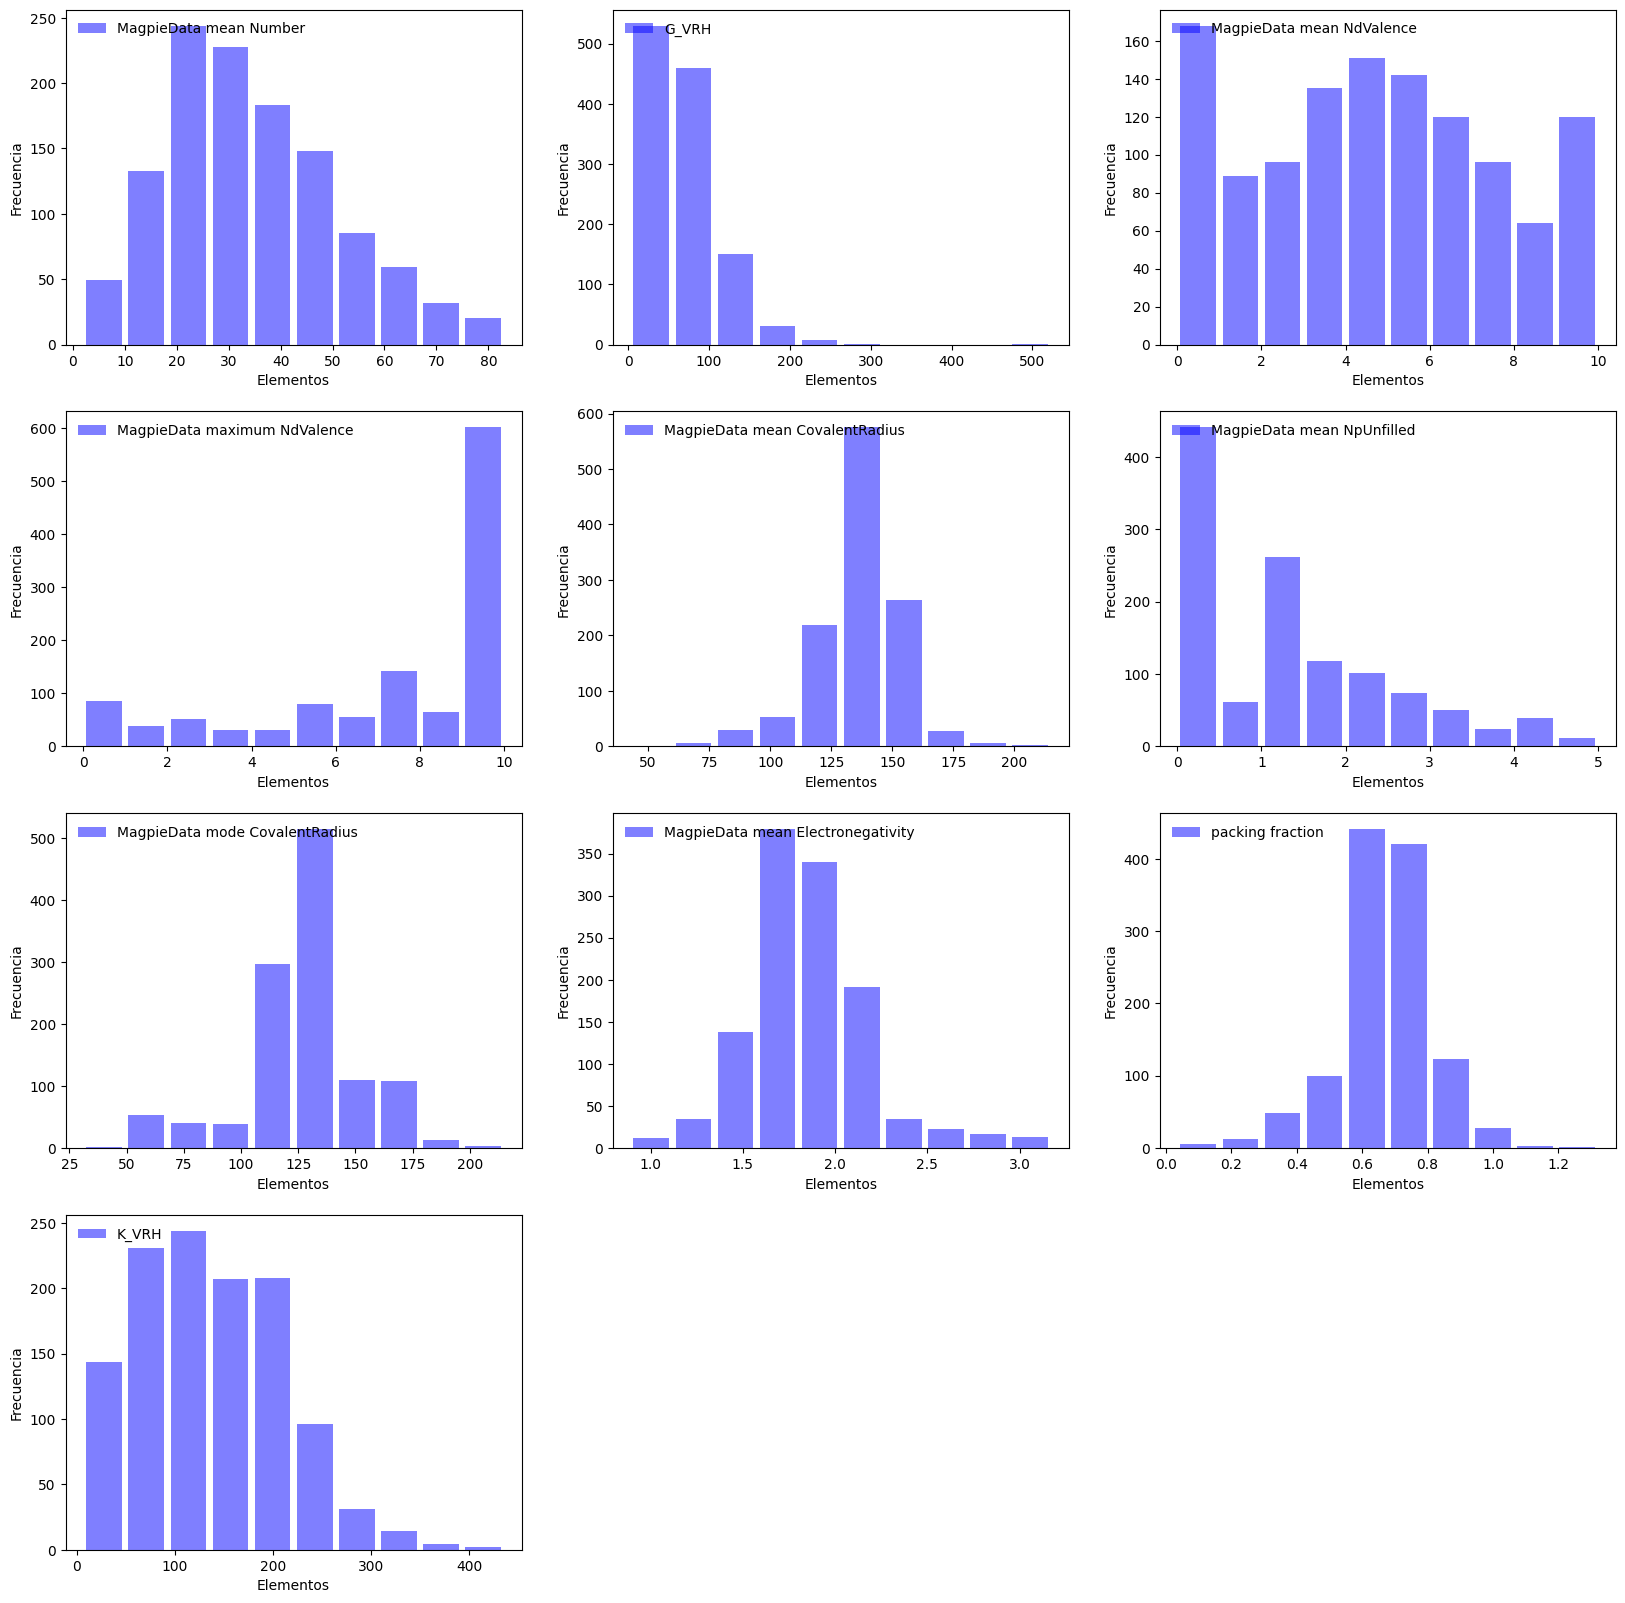

In [ ]:
# Definir número de gráficos por columna
ncols = 3
nrows = int(np.ceil(len(etiqueta) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20)) # ancho*largo

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(etiqueta):

            ax.hist(df[etiqueta[counter]], bins=10, color='blue',rwidth=0.85, alpha=0.5, label='{}'.format(etiqueta[counter]))
            ax.set_xlabel('Elementos')
            ax.set_ylabel('Frecuencia')
            #ax.set_ylim([0, 5])
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [ ]:
# MACHINE LEARNING
import tensorflow as tf
from tensorflow import keras
from keras import initializers, regularizers
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import tensorflow as tf


In [ ]:
# DEFINICIÓN DEL MODEL

kernel_init = initializers.RandomNormal(seed=30)
bias_init = initializers.Zeros()

model = Sequential()
model.add(Dense(90, activation='tanh', use_bias = True, input_shape=(x_train_scaled.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(60, activation='tanh', use_bias = True, kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(30, activation='tanh', use_bias = True,  kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1, activation='tanh', use_bias = True, kernel_initializer=kernel_init, bias_initializer=bias_init))

optimizer = tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                6120      
                                                                 
 dense_1 (Dense)             (None, 60)                5460      
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 13441 (52.50 KB)
Trainable params: 13441 (52.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#valmae_es= keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', min_delta=1e-10, patience=1000, verbose=1, mode='auto', restore_best_weights=True)
history = model.fit(x_train_scaled, y_train,  validation_data=(x_test_scaled, y_test), shuffle=False, batch_size=90, epochs=1000, verbose = False) #, callbacks=[valmse_es]batch_size=90,
val_acc_per_epoch = history.history['val_loss']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 989


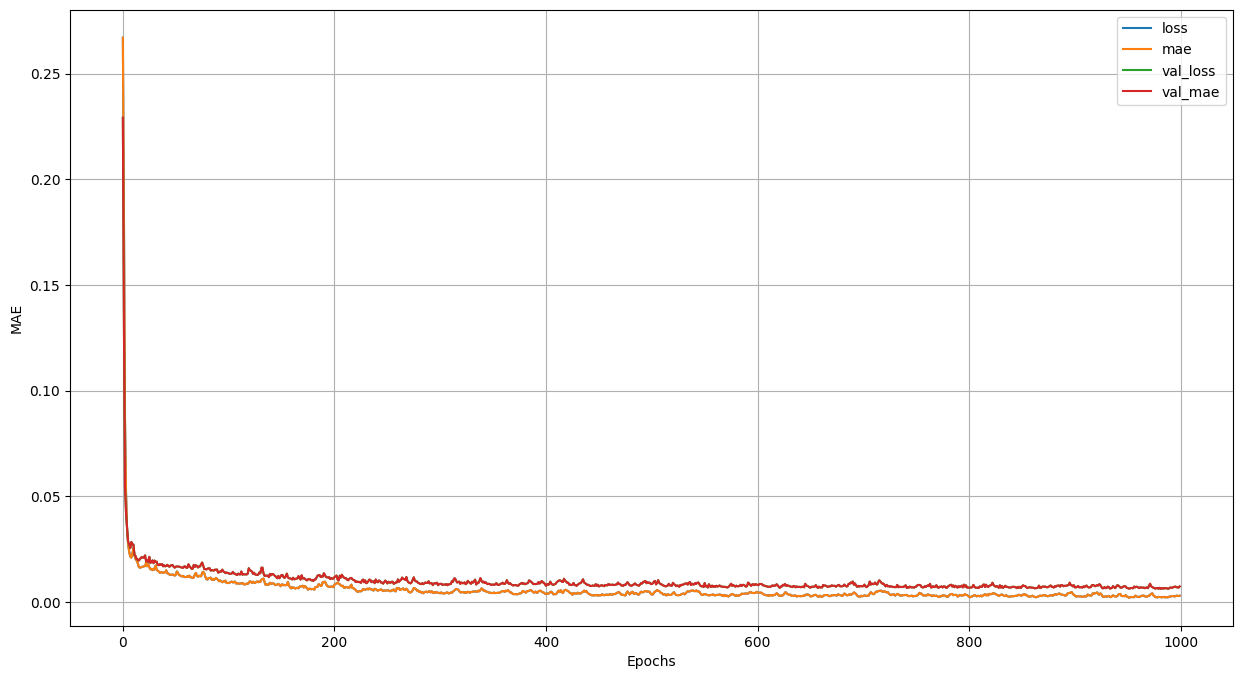

In [ ]:
pd.DataFrame(history.history).plot(figsize=(15,8))# 3n este caso tanto loss como la métrica de validación son la misma
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.show()

30/30 [==============================] - 0s 2ms/step


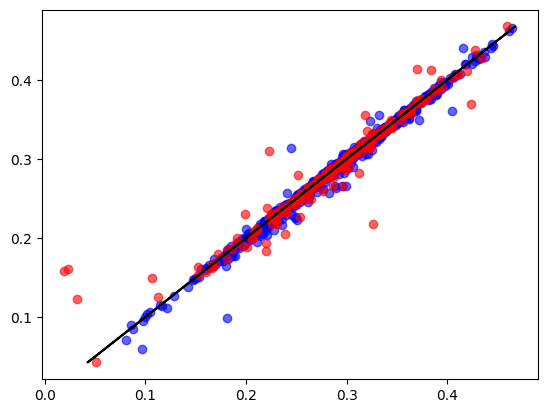

In [ ]:
y_predTest=model.predict(x_test_scaled)
y_predTrain=model.predict(x_train_scaled)

plt.scatter(y_predTrain,y_train, c='b', alpha=0.6)
plt.scatter(y_predTest,y_test, c='r', alpha=0.6)
plt.plot(y,y, c='k')


In [ ]:
metricas(model,x_test_scaled,y_test)

30/30 [==============================] - 0s 2ms/step


,rf
MAE,0.007279
MSE,0.000368
R2,0.909008
RMSE,0.019181


In [ ]:
error = y_test - y_predTest.transpose()

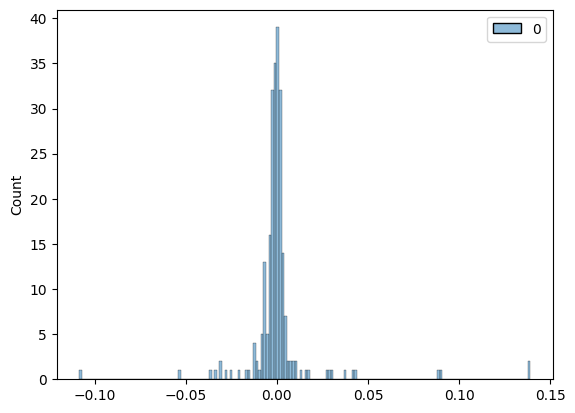

In [ ]:
sns.histplot(np.transpose(error))
plt.show()